In [ ]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import os
import boto3
from botocore.handlers import disable_signing
import re 
import numpy as np
client = boto3.client('s3')
client.meta.events.register('choose-signer.s3.*', disable_signing)

PIOP1 cohort is in prefix ds002785

preprocessed data are in /derivatives folder

let's get all the task working memory fmri files for   individual sub-001

with a paginator to research 'task-restingstate' in the files

 
and a list generator to retrive the "Key" filed on the selected objects 

In [2]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002785/derivatives/fmriprep/sub-0001/'}
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'task-restingstate')]")
task_list=[key_data['Key'] for key_data in filtered_iterator]
#nii_task=np.array([x.endswith('nii.gz') for x in task_list]) 

Now make a panda dataframe and split the file names 

We can use panda dataframes, split() functions

In [3]:
import pandas as pd
files=np.array(task_list)
filename_split = [x.split("/") for x in  files.tolist()]
pd_filename_list=  pd.DataFrame( filename_split)[5]
pd.DataFrame([y.split("_") for y in  pd_filename_list ])

,0,1,2,3,4,5
0,sub-0001,task-restingstate,acq-mb3,desc-bbregister,bold.svg,None
1,sub-0001,task-restingstate,acq-mb3,desc-carpetplot,bold.svg,None
2,sub-0001,task-restingstate,acq-mb3,desc-compcorvar,bold.svg,None
3,sub-0001,task-restingstate,acq-mb3,desc-confoundcorr,bold.svg,None
4,sub-0001,task-restingstate,acq-mb3,desc-rois,bold.svg,None
5,sub-0001,task-restingstate,acq-mb3,desc-sdc,bold.svg,None
6,sub-0001,task-restingstate,acq-mb3,desc-confounds,regressors.json,None
7,sub-0001,task-restingstate,acq-mb3,desc-confounds,regressors.tsv,None
8,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,boldref.nii.gz,None
9,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz


now list all the nii.gz files

we can use 'endwith' function


In [4]:
nii_task=np.array([x.endswith('nii.gz') for x in task_list]) 
nii_files=np.asarray(task_list)[nii_task]
pd.DataFrame([y.split("_") for y in pd.DataFrame([x.split("/") for x in  nii_files])[5] ])

,0,1,2,3,4,5
0,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,boldref.nii.gz,None
1,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
2,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
3,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
4,sub-0001,task-restingstate,acq-mb3,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
5,sub-0001,task-restingstate,acq-mb3,space-T1w,boldref.nii.gz,None
6,sub-0001,task-restingstate,acq-mb3,space-T1w,desc-aparcaseg,dseg.nii.gz
7,sub-0001,task-restingstate,acq-mb3,space-T1w,desc-aseg,dseg.nii.gz
8,sub-0001,task-restingstate,acq-mb3,space-T1w,desc-brain,mask.nii.gz
9,sub-0001,task-restingstate,acq-mb3,space-T1w,desc-preproc,bold.nii.gz


select the key for preprocessed resting frmi volumes in MNI space

In [5]:
file_key=nii_files[4]

In [6]:
import os.path
if not  os.path.exists( "resting.nii.gz"):
    client.download_file("openneuro.org", file_key, "resting.nii.gz")

In [ ]:
! pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from nilearn import plotting
from nilearn import image

/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()


(65, 77, 60, 480)



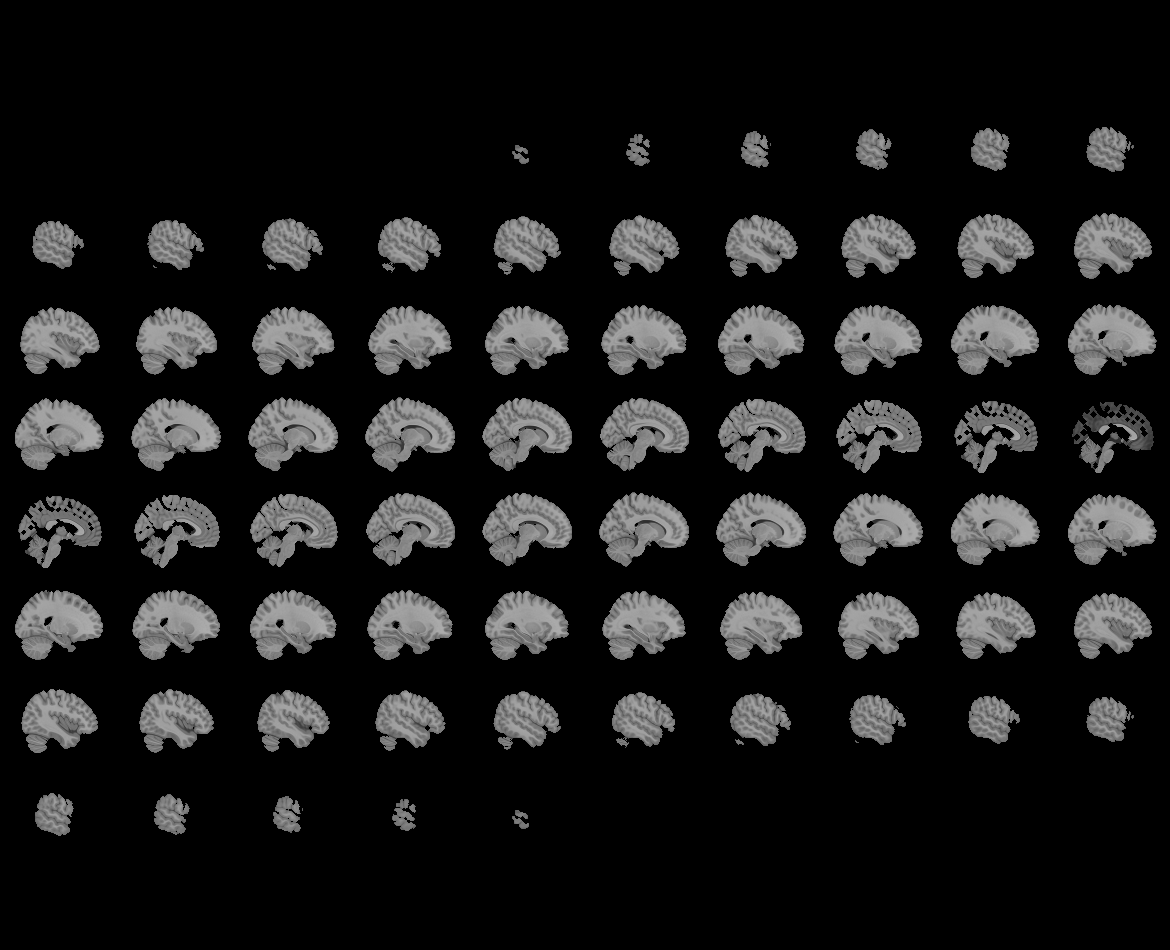
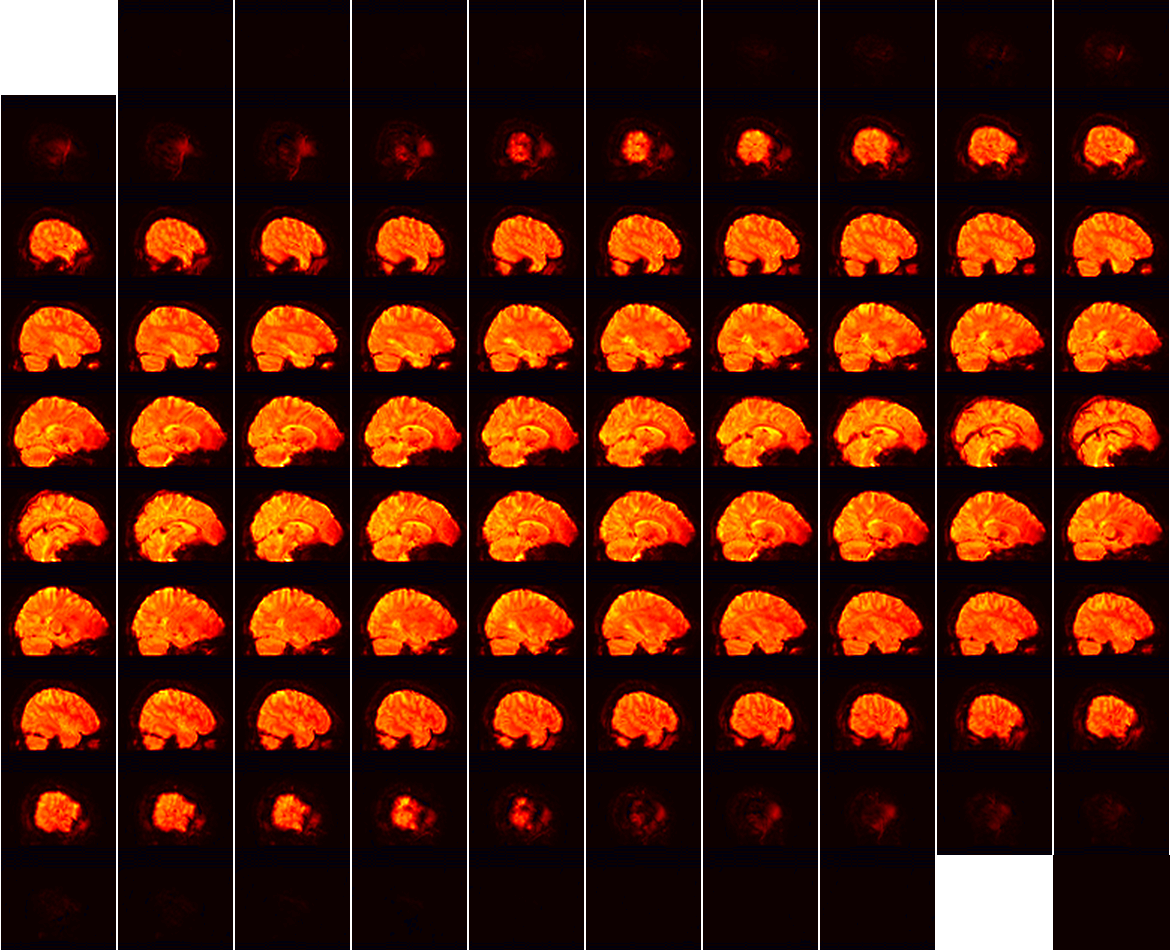

In [8]:
img=image.load_img("resting.nii.gz")
print(img.get_data().shape)

plotting.view_img(image.mean_img(img), threshold=None)

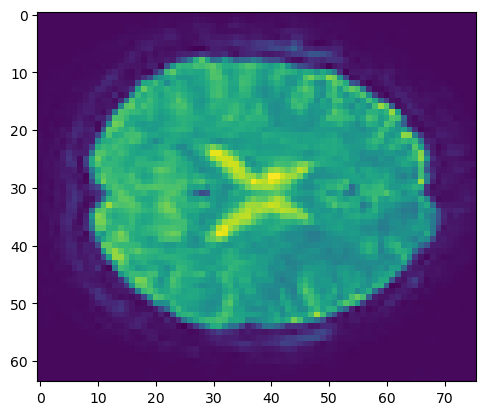

In [9]:
from matplotlib import pyplot as plt
volume= .. # extract voil;ume data from image
flat_slice=volume[1:,1:,30,0]
plt.imshow(flat_slice, interpolation='nearest')
plt.show()


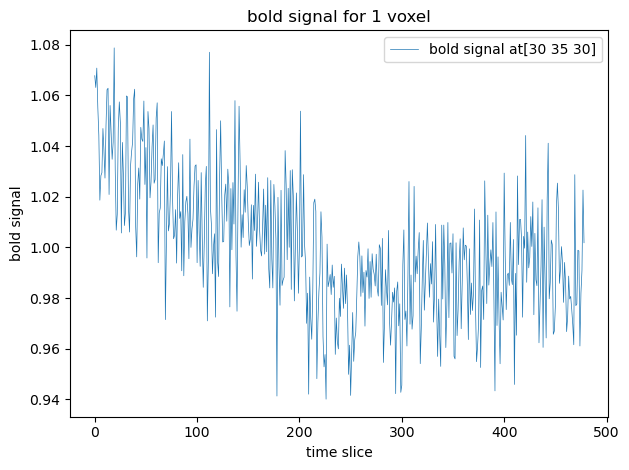

In [10]:
ts=... #extract one time serie
plt.plot(range(0,len(ts)), ts/ts.mean(), label='bold signal at'+np.array2string(np.array([30,35,30])), 
         linewidth=0.5)

# Add title and labels

plt.title('bold signal for 1 voxel')
plt.xlabel('time slice')
plt.ylabel('bold signal')

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

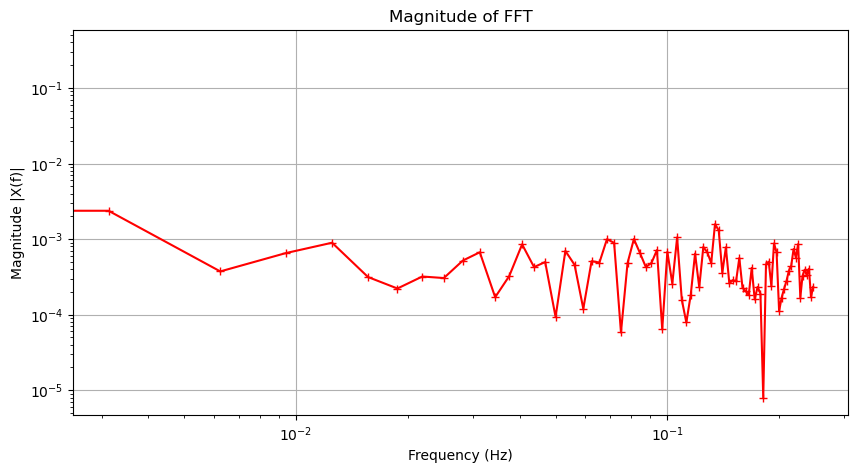

In [11]:
from scipy.fft import fft,fftfreq
from scipy.fftpack import fftshift

dt2 = ... #  use TR of the EPI acqisition
fs2 = 1/dt2 
# time vector
# Calculate the FFT
L = # find out the number of acquisitions 
T2 = L*dt2 # duration, seconds

tv2 = np.linspace(0,1,L) # time vector in sec

NFFT = 160
Y_chirp = fft(... ,NFFT) # use the time serie normalized by its average 

fv2 = fftfreq(NFFT, dt2)[:NFFT//2] # make the frequency vector

plt.figure(figsize=(10,5))
plt.loglog(fv2,abs(Y_chirp[:NFFT//2])/(L),'r-+')
plt.title('Magnitude of FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude |X(f)|')
#plt.xlim([0, 100])
plt.grid()
plt.show()

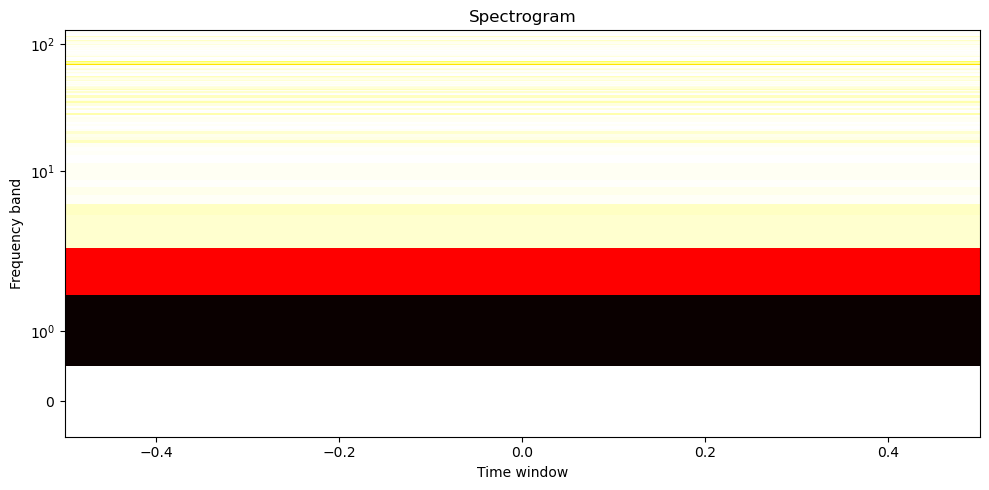

In [12]:
from scipy.signal import spectrogram
#plot windowed t/f analysis 
freqs, times, spectro = spectrogram( ts,fs=fs2) #, nperseg=int(ts.mean()))

plt.figure(figsize=(10, 5))
plt.imshow(spectro, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.yscale('symlog')
plt.tight_layout()
plt.show()

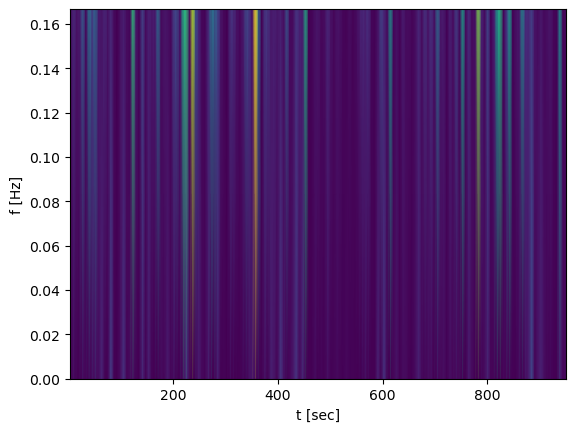

In [13]:
#plot windowed t/f analysis 
freqs, times, spectro = spectrogram( ts,fs=fs2, nperseg=3)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
#plt.yscale('symlog')
plt.show()

/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


(65, 77, 60, 480)


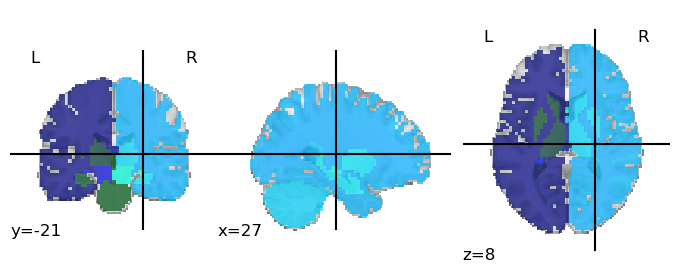

In [15]:
import matplotlib as plt
file_key= ... # find which image is the mask of regions
if not  os.path.exists( "my.nii_seg.nii.gz"): 
    client.download_file("openneuro.org", file_key, "my.nii_seg.nii.gz")


img_seg=image.load_img("my.nii_seg.nii.gz")
print(img.get_data().shape)
plotting.plot_roi((img_seg))#, threshold=None, cmap=plt.cm.prism)

In [ ]:
from nilearn.masking import apply_mask
img_segbool=img_seg.get_fdata()
img_segbool[img_seg.get_fdata() ==3 ]=1
img_segbool.shape

(65, 77, 60)

In [ ]:
import nibabel as nb
masked_data = apply_mask(imgs=img, mask_img= nb.Nifti1Image(img_segbool, affine=img.affine))


# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels
masked_data

array([[ 8341.589 ,  3290.6147, 10583.02  , ..., 10559.307 ,  6823.5093,
         9750.625 ],
       [ 7861.273 ,  3068.212 , 10249.889 , ..., 10534.093 ,  6896.7983,
         9644.485 ],
       [ 8208.82  ,  3472.7986,  9576.868 , ..., 10377.419 ,  6713.021 ,
         9702.011 ],
       ...,
       [ 7578.323 ,  5521.6997, 10259.065 , ..., 11084.589 ,  6153.0557,
        10037.719 ],
       [ 7450.3945,  5411.411 , 10682.107 , ..., 10812.248 ,  6469.1504,
        10033.522 ],
       [ 7210.9717,  5567.606 , 10440.601 , ..., 10778.725 ,  6488.837 ,
         9989.455 ]], dtype=float32)

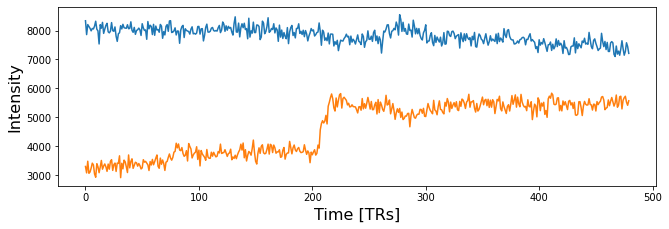

In [ ]:
# And now plot two time series
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(masked_data[:, :2])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
#plt.xlim(0, 150)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()